<a href="https://colab.research.google.com/github/amifra8uni/LabCMP/blob/main/Esame_28_gennaio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motion of a Satellite in Earth's Atmosphere
## Esame del 28 gennaio 2022

Use Python for the following tasks. In all cases, display results obtained with both algoritms.
1. Show that the results of `app.cpp` are correct if you simulate the free fall of a point mass ($A = 0$), that is, that they match $y(t)= gt^2/2$ and are indipendent of $m$. Use $r_0 = 250$ m and $\Delta t = 0.01$ s. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


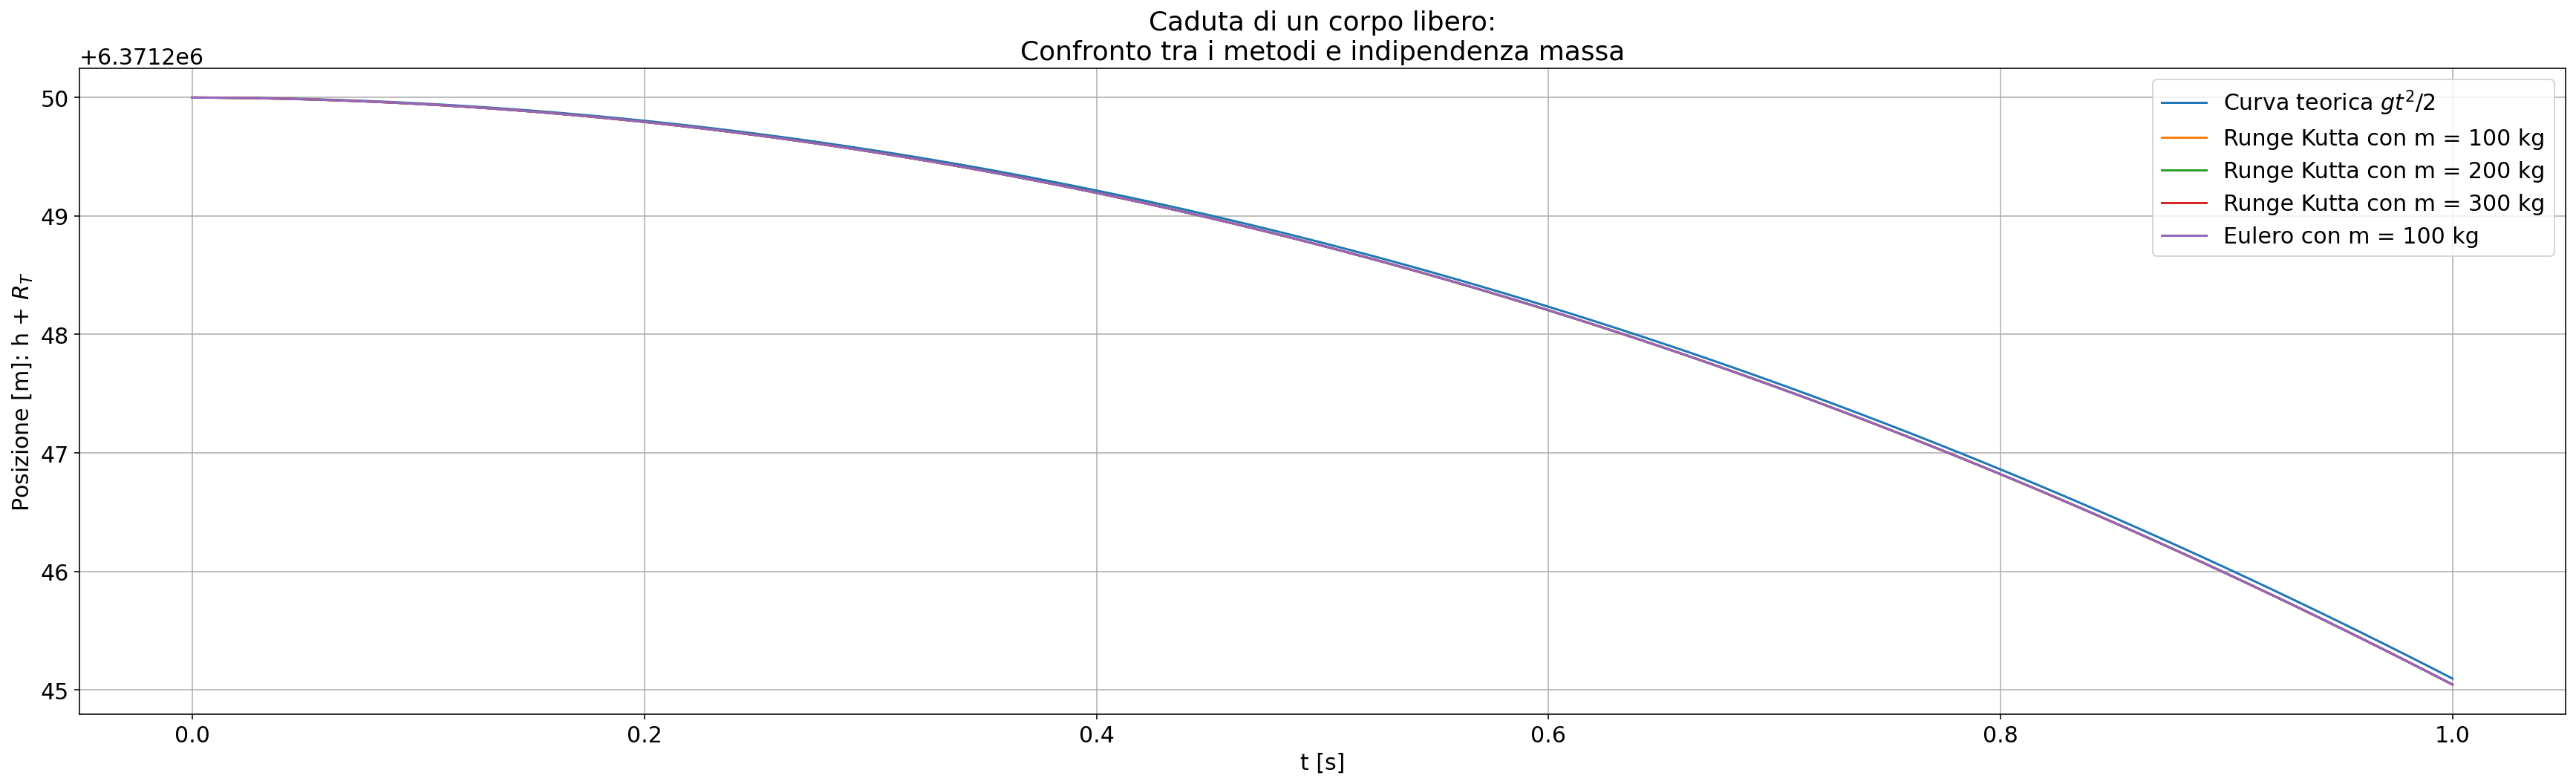

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.figure(figsize=(30,8))
plt.rc('font', size=15) 

# Importo le coordinate x dell'oggetto dei file con le tre simulazioni RK2 con masse diverse
RK_100kg = '/content/drive/MyDrive/Colab Notebooks/Computing_Methods/Esame/sim1_RK_100.dat'
RK_200kg = '/content/drive/MyDrive/Colab Notebooks/Computing_Methods/Esame/sim1_RK_200.dat'
RK_300kg = '/content/drive/MyDrive/Colab Notebooks/Computing_Methods/Esame/sim1_RK_200.dat'
Eu_100kg = '/content/drive/MyDrive/Colab Notebooks/Computing_Methods/Esame/sim1_Eu_100.dat'
x1 = np.loadtxt(RK_100kg, unpack=True, usecols=0)
x2 = np.loadtxt(RK_200kg, unpack=True, usecols=0)
x3 = np.loadtxt(RK_300kg, unpack=True, usecols=0)
x1_Eu = np.loadtxt(Eu_100kg, unpack=True, usecols=0)

# Definisco una funzione per confrontare il valore teorico
def caduta_libera(t):
  g = 9.81; # m/s^2
  return x1[0] - 0.5*g*t*t;

# Grafico i tre andamenti
t = np.arange(len(x1)*0.01, step = 0.01)
plt.plot(t, caduta_libera(t), label = "Curva teorica $gt^2/2$")
plt.plot(t, x1, label = "Runge Kutta con m = 100 kg")
plt.plot(t, x2, label = "Runge Kutta con m = 200 kg")
plt.plot(t, x3, label = "Runge Kutta con m = 300 kg")
plt.plot(t, x1_Eu, label = "Eulero con m = 100 kg")
plt.title("Caduta di un corpo libero:\nConfronto tra i metodi e indipendenza massa")
plt.xlabel("t [s]")
plt.ylabel(r"Posizione [m]: h + $R_T$")
plt.legend()
plt.grid()
plt.show()

2. Show the evolution of a satellite with mass 1200 Kg and $A=25$ m$^2$ that starts at an altitude of 600 km. Use $\Delta t = 1$ s, $F10.7=80$ SFUs, $A_p=50$ and $C_d = 2$.

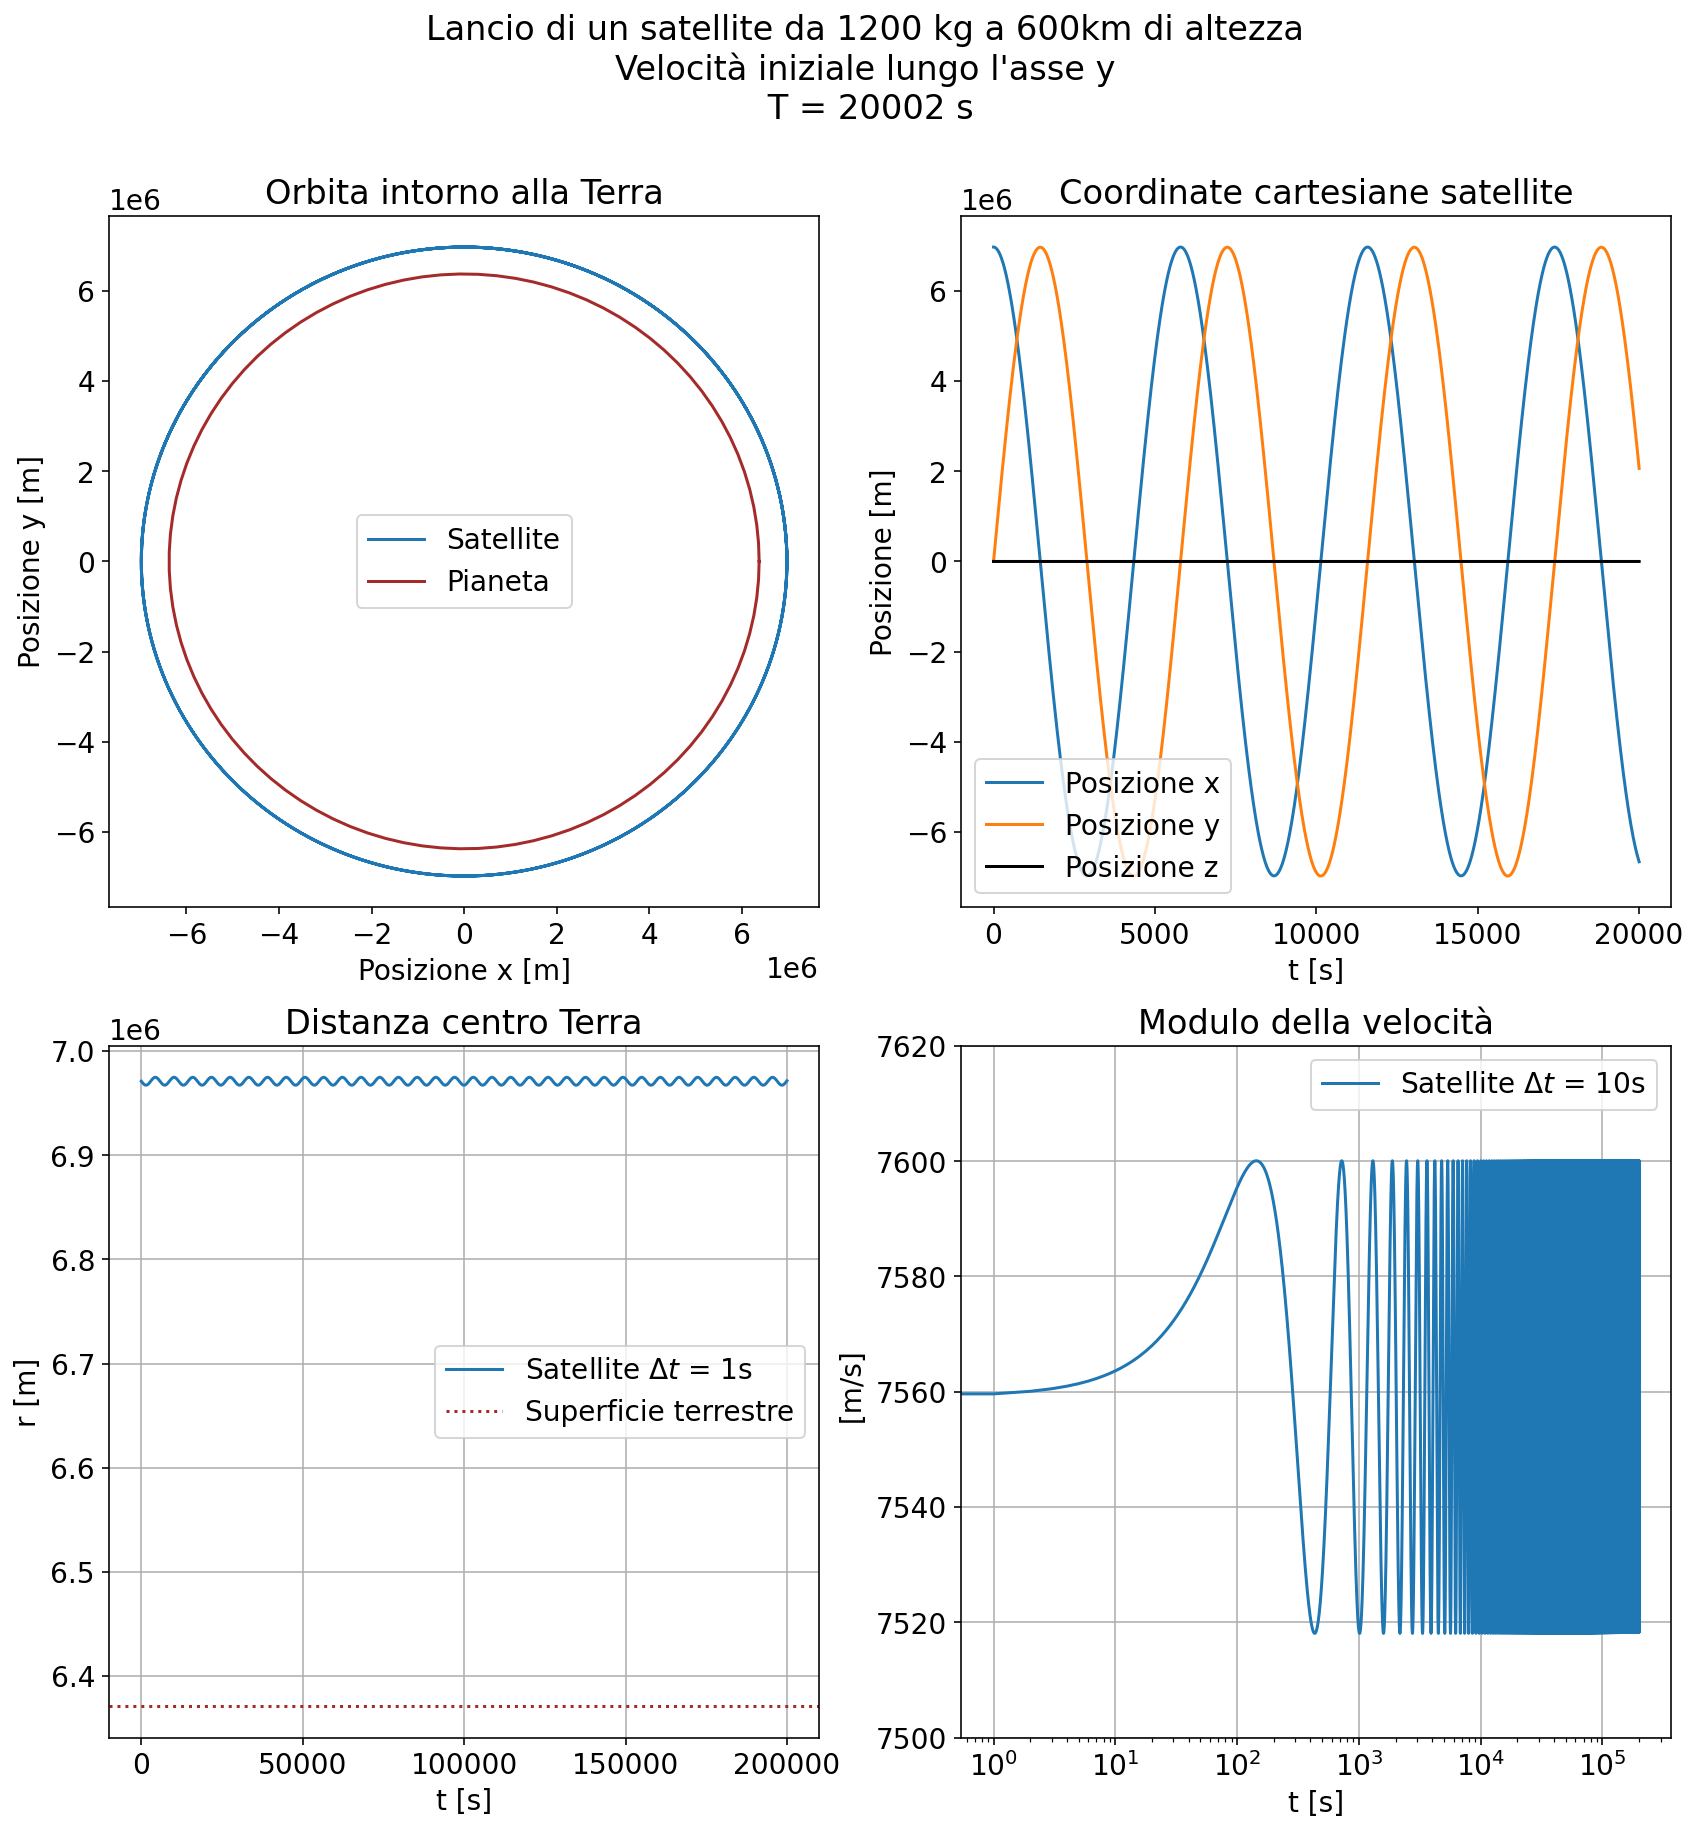

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.figure(figsize=(14,14))
plt.rc('font', size=14) 

# Importo le coordinate x dell'oggetto dei file della simulazione
RK_1200kg = '/content/drive/MyDrive/Colab Notebooks/Computing_Methods/Esame/sim2_dt_1.dat'
x,y,z = np.loadtxt(RK_1200kg, unpack=True, usecols=(0,1,2))
t = np.arange(len(x)*1, step = 1)

## Plot 1 ##
# Vediamo innanzitutto se compie un orbita circolare
plt.subplot(2, 2, 1)
plt.suptitle("Lancio di un satellite da 1200 kg a 600km di altezza\nVelocità iniziale lungo l'asse y\n T = %.0f s" % len(x))
plt.plot(x,y, label = "Satellite")
plt.title("Orbita intorno alla Terra")
plt.xlabel("Posizione x [m]")
plt.ylabel(r"Posizione y [m]")

# Disegno la superficie della terra
RT = 6371000 # m
theta = np.linspace(0, 2*np.pi, 100)
xTerra = RT*np.cos(theta)
yTerra = RT*np.sin(theta)
plt.plot(xTerra,yTerra, label = "Pianeta", color= "brown")
plt.legend()

## Plot 2 ##
# Disegno l'evoluzione temporale della componenta x e y
# Mi aspetto un andamento circa sinusoidale
# plt.figure(figsize=(12,12))
plt.subplot(2, 2, 2)
plt.plot(t, x, label = "Posizione x")
plt.plot(t, y, label = "Posizione y")
plt.plot(t, z, label = "Posizione z", color = "black")
plt.title("Coordinate cartesiane satellite")
plt.ylabel("Posizione [m]")
plt.xlabel(r"t [s]")
plt.legend()

## Plot 3
# Voglio vedere quanto il satellite si avvicina alla terra (se lo fa)
plt.subplot(2, 2, 3)
RK_1200kg_N_200k = '/content/drive/MyDrive/Colab Notebooks/Computing_Methods/Esame/sim2_dt_1_N_200k.dat'
r = np.loadtxt(RK_1200kg_N_200k, unpack = True, usecols = 6)
tt = np.arange(len(r)*1, step = 1)
plt.plot(tt, r, label = "Satellite $\Delta t$ = 1s")
plt.axhline(y = RT, color = 'brown', linestyle = ':', label = "Superficie terrestre")
plt.title("Distanza centro Terra")
plt.xlabel("t [s]")
plt.ylabel("r [m]")
plt.grid()
plt.legend()

## Plot 4
# Il satellite oscilla, vedo cosa succede alla velocità
plt.subplot(2, 2, 4)
RK_1200kg_N_200k = '/content/drive/MyDrive/Colab Notebooks/Computing_Methods/Esame/sim2_dt_10_N_200k.dat'
v = np.loadtxt(RK_1200kg_N_200k, unpack = True, usecols = 7)
t_v = np.arange(len(v)*1, step = 1)
plt.plot(t_v, v, label = "Satellite $\Delta t$ = 10s")
#plt.axhline(y = RT, color = 'brown', linestyle = ':', label = "Superficie terrestre")
plt.title("Modulo della velocità")
plt.xlabel("t [s]")
plt.ylabel(" [m/s]")
plt.ylim(7500,7620)
plt.xscale('log')
plt.grid()
plt.legend()

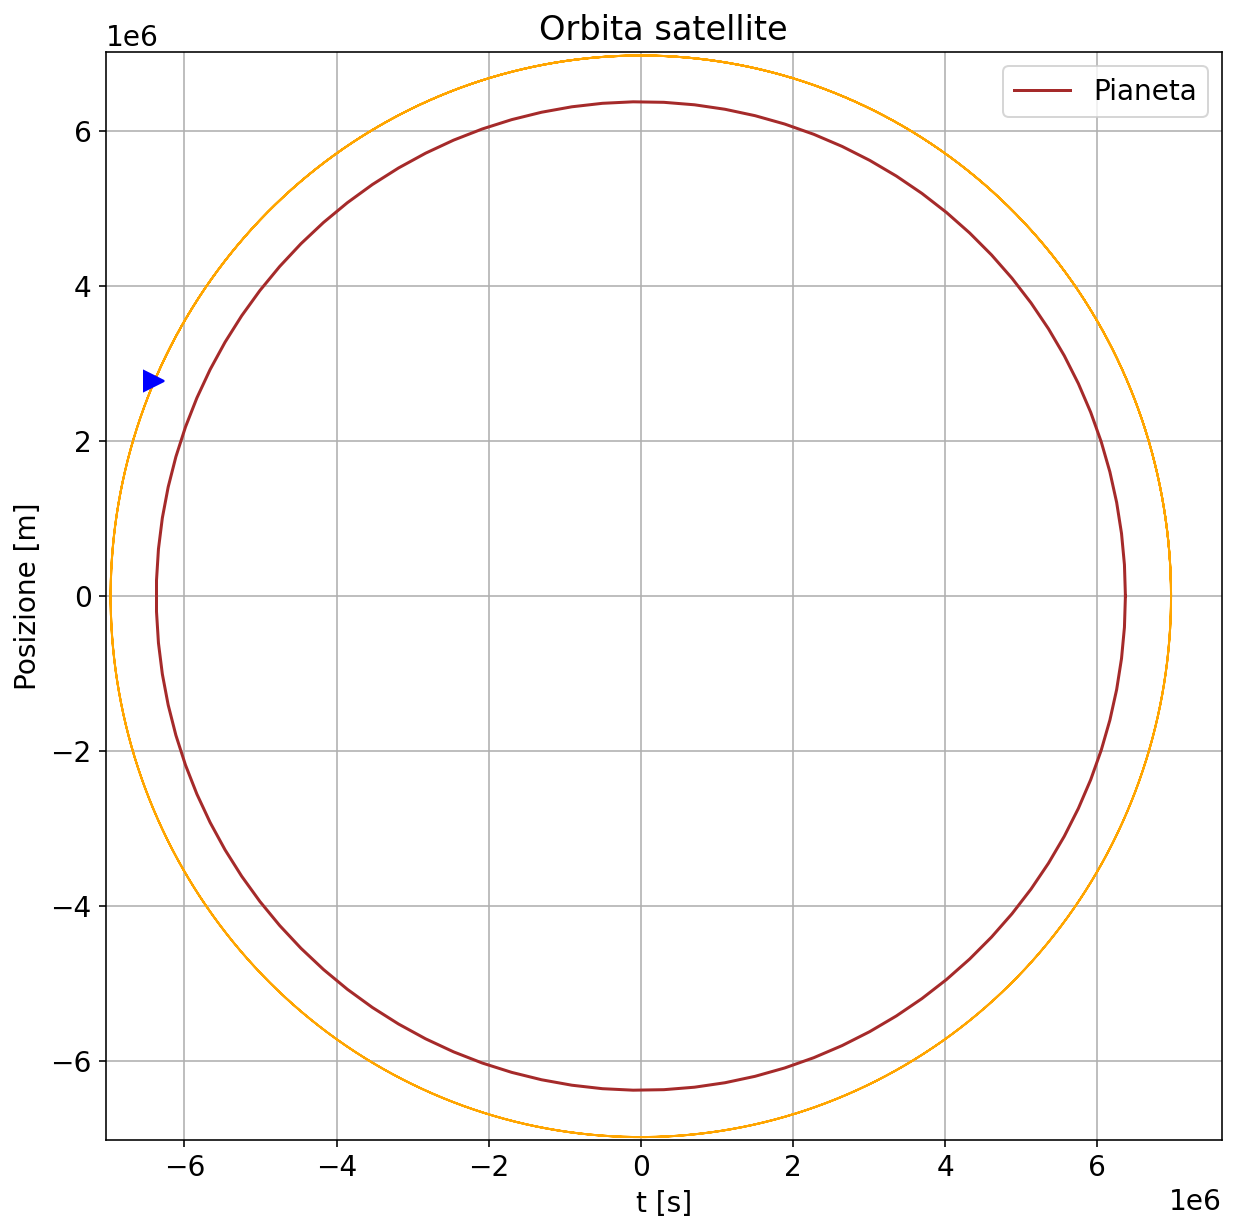

In [ ]:
# Proviamo ad animarlo
import matplotlib.animation as animation
%config InlineBackend.figure_format ='retina'

# Create a figure object
fig = plt.figure(figsize=(10,10))

# Add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=True) # xlim=(x.min()-100, x.max()+100), ylim=(y.min()-100, y.max()+100)
ax.grid()
ax.set_xlabel(r"t [s]")
ax.set_ylabel("Posizione [m]")
plt.title("Orbita satellite")
RT = 6371000 # m
theta = np.linspace(0, 2*np.pi, 100)
xTerra = RT*np.cos(theta)
yTerra = RT*np.sin(theta)
plt.plot(xTerra,yTerra, label = "Pianeta", color= "brown")
plt.legend()
# 1. Plot the initial state of the plot
i = 0
path, *_ = ax.plot(x[i], y[i], '-', lw=1, color='orange')
walker, *_ = ax.plot(x[i], y[i], '>', lw=2, ms=10, color='blue')

# 2. Function to refresh objects in the plot
def refresh(i):
    # Draw the line from 0th -> i-th position
    path.set_data(x[:i], y[:i])
    # Draw the walker ONLY at the i-th position
    walker.set_data(x[i], y[i])
    # Return a tuple
    return path, walker

# 3. Call the FuncAnimation function to redraw the 'fig' object using the 'refresh' function
ani = animation.FuncAnimation(fig, refresh, np.arange(1, len(x)-1, 100), interval=50, blit=True, repeat=False)

# Rendering
from matplotlib import rc
rc('animation', html='html5')
ani

3. Show how the evolution for the previous scenario changes if you vary $\Delta t = 1$ s.

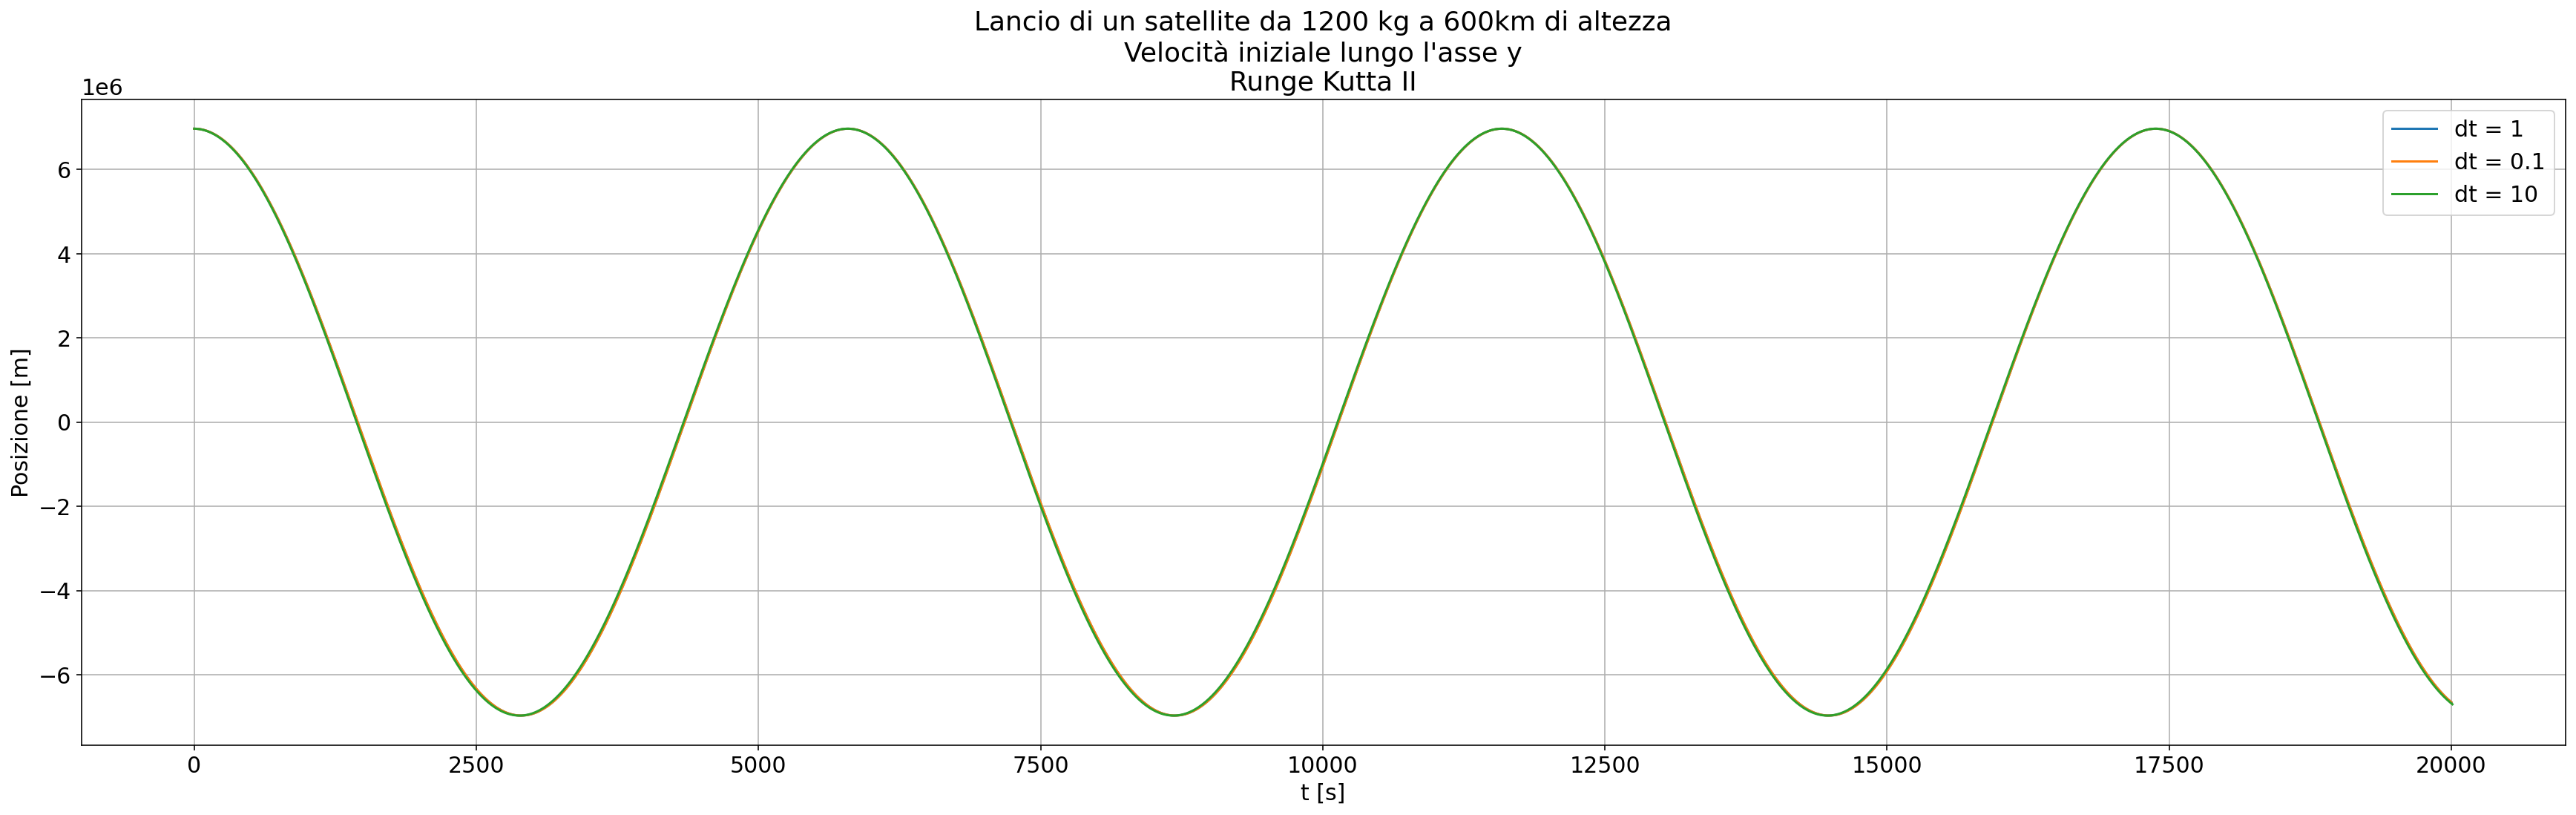

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.figure(figsize=(30,8))
plt.rc('font', size=15) 

## Plot 2 ##
# Disegno l'evoluzione temporale della componenta x e y
# Mi aspetto un andamento circa sinusoidale
RK_1200kg = '/content/drive/MyDrive/Colab Notebooks/Computing_Methods/Esame/sim2_dt_1.dat'
x,y,z = np.loadtxt(RK_1200kg, unpack=True, usecols=(0,1,2))
t = np.arange(len(x)*1, step = 1)
plt.plot(t, x, label = "dt = 1")

RK_1200kg_dt01 = '/content/drive/MyDrive/Colab Notebooks/Computing_Methods/Esame/sim2_dt_01.dat'
x01,y01,z01 = np.loadtxt(RK_1200kg_dt01, unpack=True, usecols=(0,1,2))
t01 = np.arange(len(x01)*0.1, step = 0.1)
plt.plot(t01, x01, label = "dt = 0.1")

RK_1200kg_dt01 = '/content/drive/MyDrive/Colab Notebooks/Computing_Methods/Esame/sim2_dt_10.dat'
x10,y10 = np.loadtxt(RK_1200kg_dt01, unpack=True, usecols=(0,1))
t10 = np.arange(len(x10)*10, step = 10)
plt.plot(t10, x10, label = "dt = 10")

plt.title("Lancio di un satellite da 1200 kg a 600km di altezza\nVelocità iniziale lungo l'asse y\nRunge Kutta II")
plt.ylabel("Posizione [m]")
plt.xlabel(r"t [s]")
plt.legend()
plt.grid()

4. Provide the ability to check that the value of $z$ remains 0 (or approximately 0) thorough-out your simulations. Comment your result.

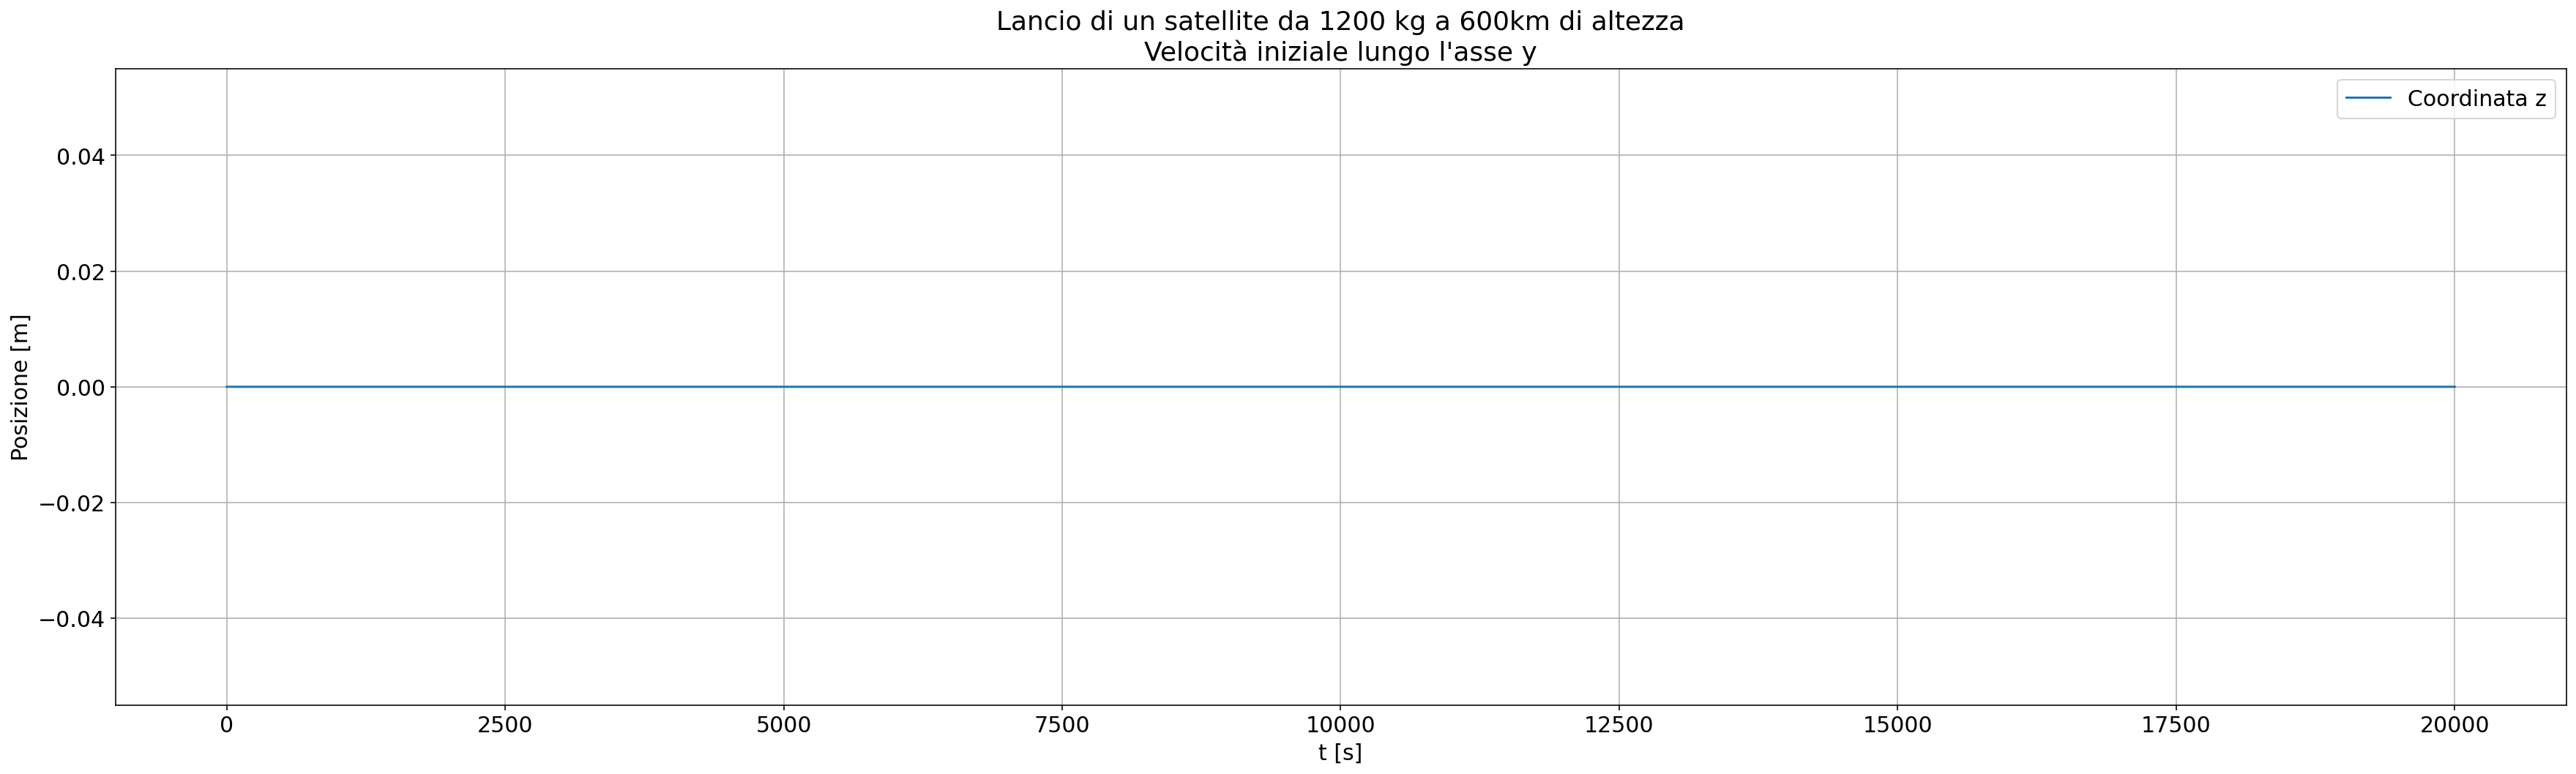

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.figure(figsize=(30,8))
plt.rc('font', size=15) 

plt.plot(t, z, label = "Coordinata z")
plt.title("Lancio di un satellite da 1200 kg a 600km di altezza\nVelocità iniziale lungo l'asse y")
plt.ylabel("Posizione [m]")
plt.xlabel(r"t [s]")
plt.legend()
plt.grid()

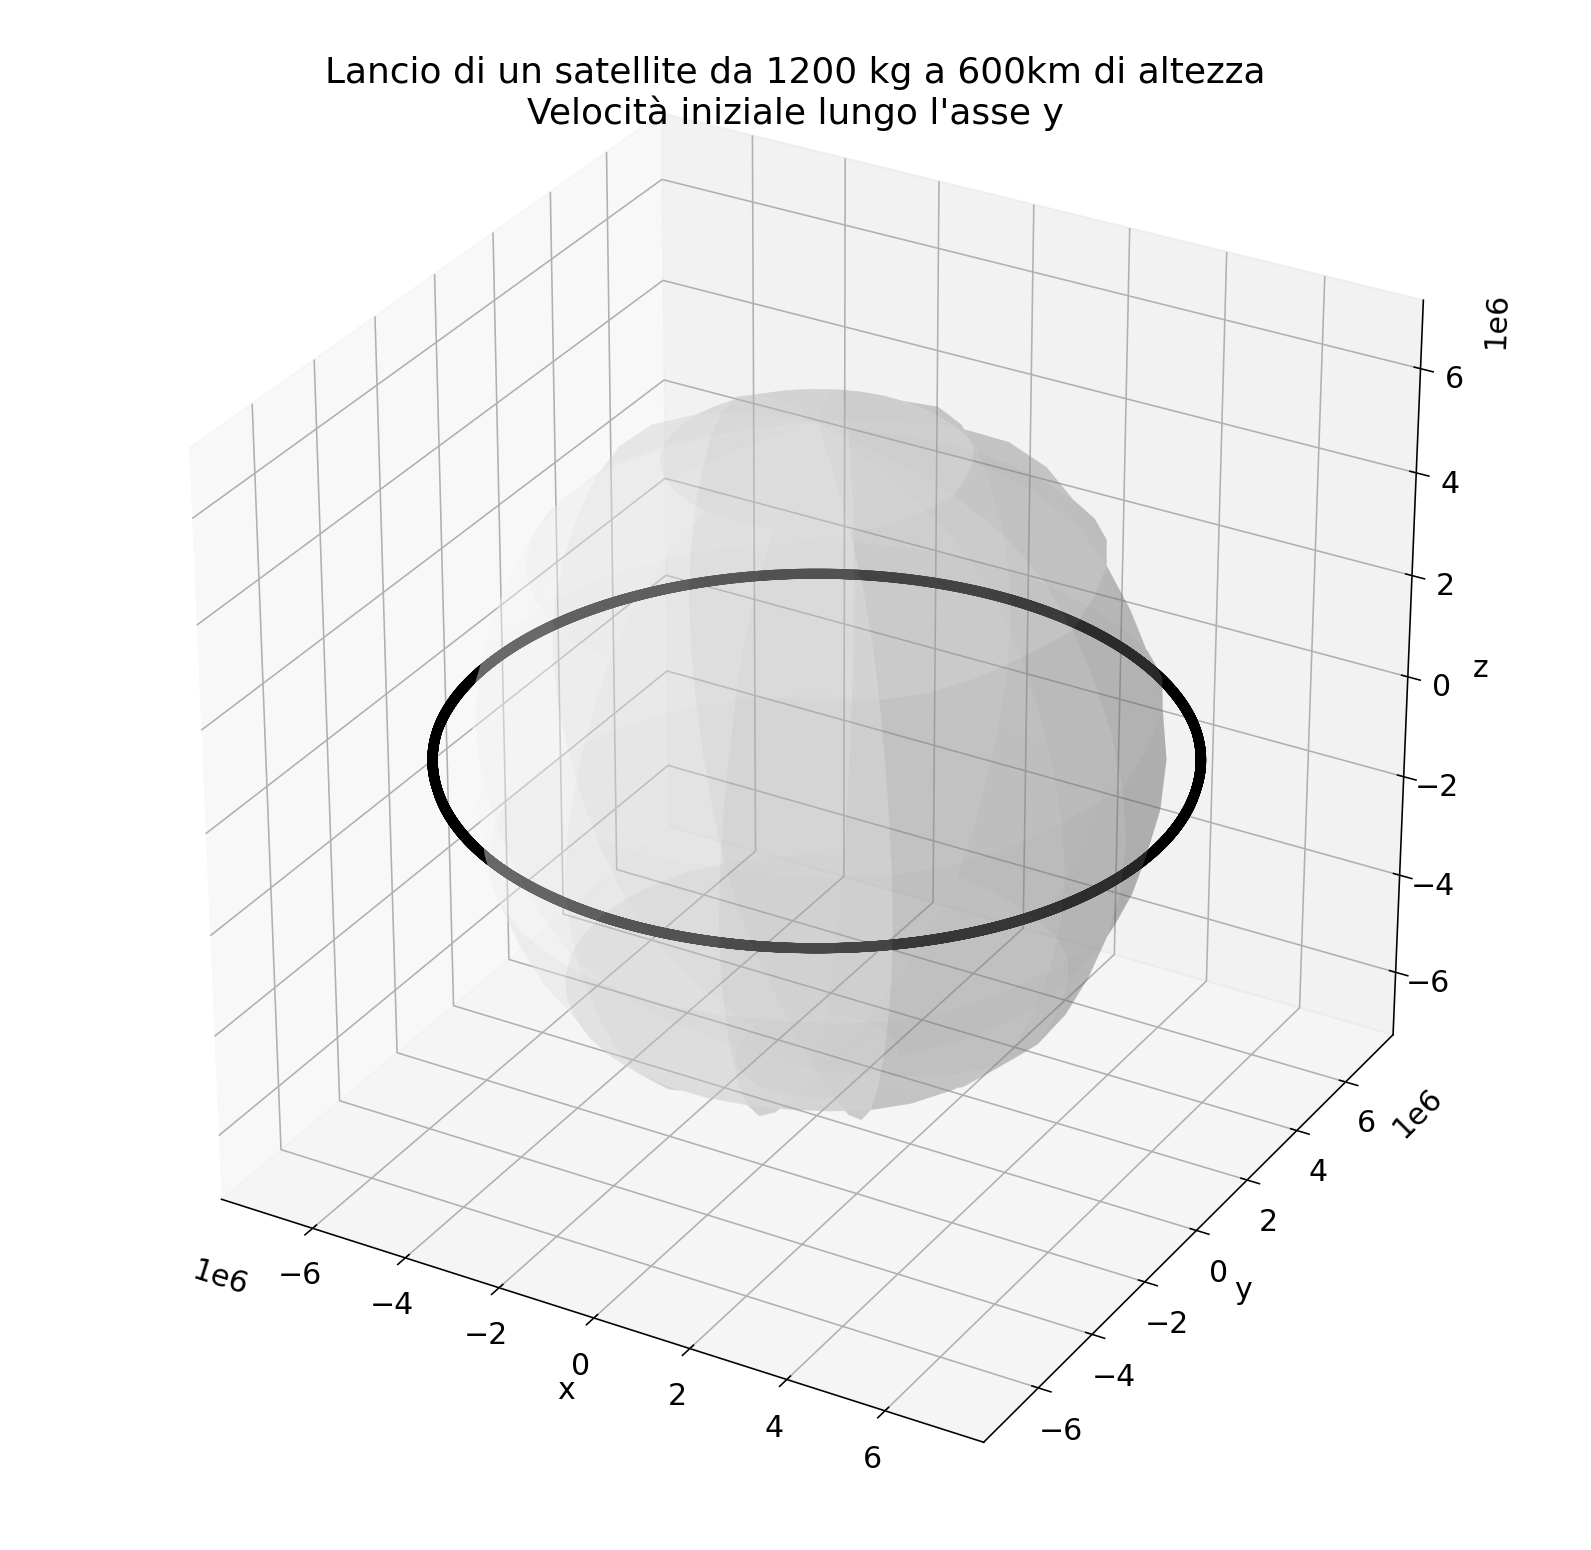

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

plt.rc('font', size=15) 
fig = plt.figure(figsize=(14,14))

# Add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, projection='3d')
#ax.grid(False)
#ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

RK_1200kg = '/content/drive/MyDrive/Colab Notebooks/Computing_Methods/Esame/sim2_dt_1.dat'
x,y,z = np.loadtxt(RK_1200kg, unpack=True, usecols=(0,1,2))
ax.scatter3D(x, y, z, color='k', marker='*', s=20)

plt.title("Lancio di un satellite da 1200 kg a 600km di altezza\nVelocità iniziale lungo l'asse y")

# Disegno una sfera per il pianeta
from mpl_toolkits.mplot3d import Axes3D
import scipy.ndimage

u = np.linspace(0, 2 * np.pi, 13)
v = np.linspace(0, np.pi, 7)

RT = 6371000 # m
xP = RT * np.outer(np.cos(u), np.sin(v))
yP = RT * np.outer(np.sin(u), np.sin(v))
zP = RT * np.outer(np.ones(np.size(u)), np.cos(v))

# use scipy to interpolate
xdata = scipy.ndimage.zoom(xP, 3)
ydata = scipy.ndimage.zoom(yP, 3)
zdata = scipy.ndimage.zoom(zP, 3)

ax.plot_surface(xdata, ydata, zdata, rstride=3, alpha=0.25, cstride=3, color='w', shade=1)

5. Plot the mechanical energy $(mv^2-GmM_\oplus/r)$ as a function of time for a few of your simulations. Comment your results.

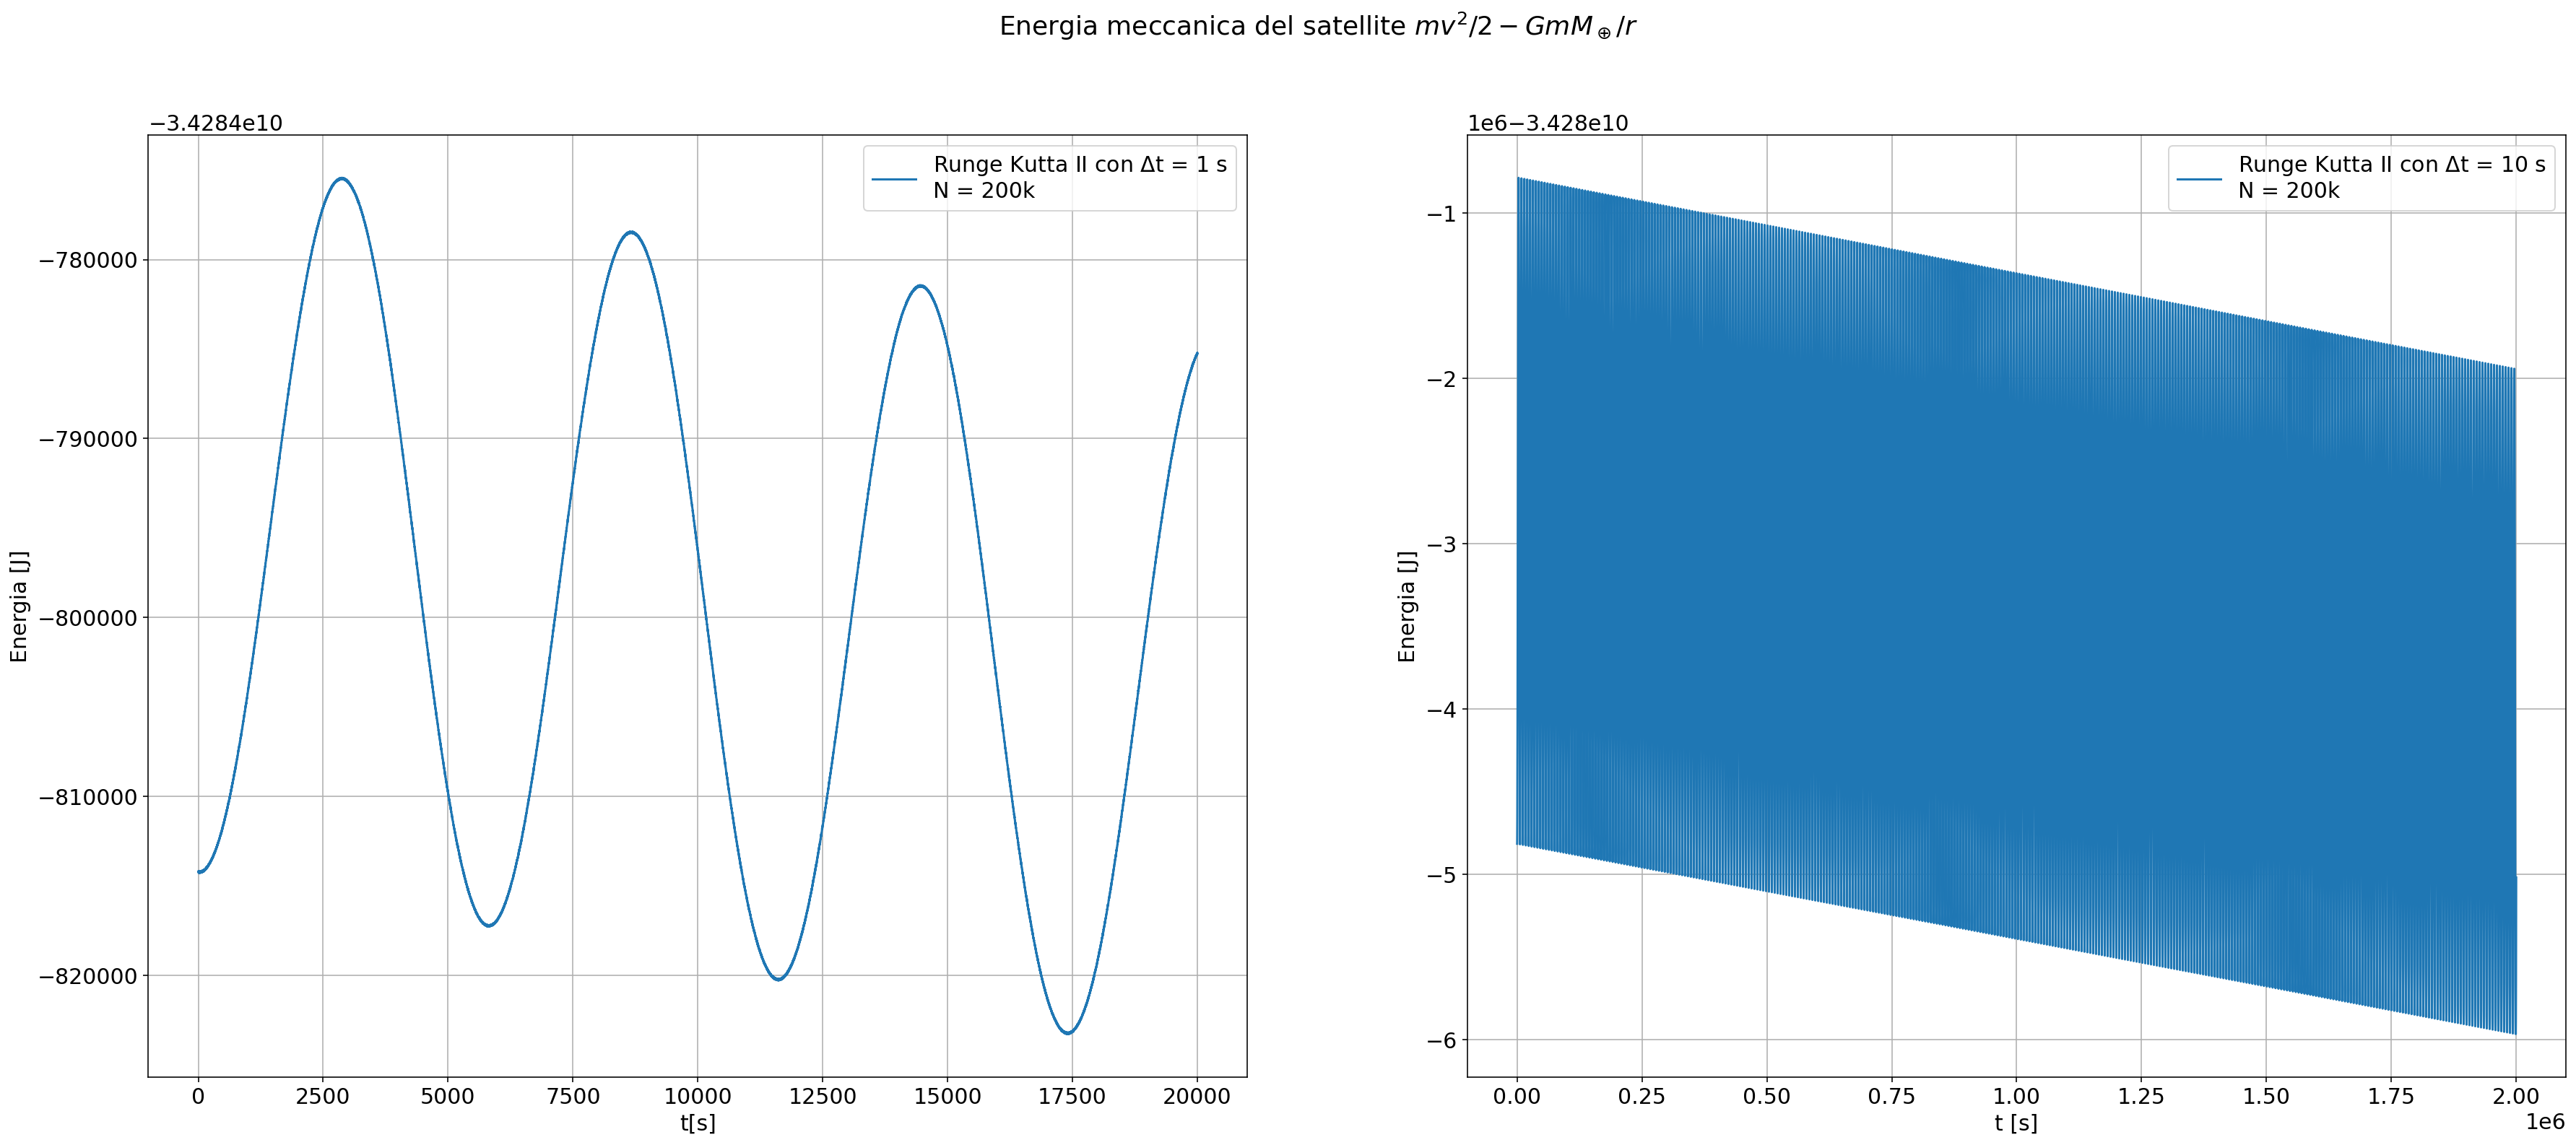

In [ ]:
%config InlineBackend.figure_format ='retina'
plt.rc('font', size=15) 
fig = plt.figure(figsize=(30,12))

plt.suptitle("Energia meccanica del satellite $mv^2/2-GmM_\oplus/r$")
RK_1200kg = '/content/drive/MyDrive/Colab Notebooks/Computing_Methods/Esame/sim2_dt_1.dat'
x,y,z, vx, vy, vz = np.loadtxt(RK_1200kg, unpack=True, usecols=(0,1,2,3,4,5))
t = np.arange(len(x)*1, step = 1)

RK_1200kg = '/content/drive/MyDrive/Colab Notebooks/Computing_Methods/Esame/sim2_dt_10_N_200k.dat'
x2,y2,z2, vx2, vy2, vz2 = np.loadtxt(RK_1200kg, unpack=True, usecols=(0,1,2,3,4,5))
t2 = np.arange(len(x2)*10, step = 10)

## Plot 1 ##
plt.subplot(1, 2, 1)
# Definisco la mia funzione energia meccanica
def Mech_Energy(x, y, z, vx, vy, vz):
  m = 1200 # kg
  M = 5.972*10**24 #kg
  G = 6.67*10**(-11) # Nm^2/kg^2
  r = np.sqrt(x*x + y*y + z*z)
  v = np.sqrt(vx*vx + vy*vy + vz*vz)
  return (0.5*m*v*v - G*m*M/r)

vMech_Energy = np.vectorize(Mech_Energy)

plt.ylabel("Energia [J]")
plt.xlabel("t[s]")
plt.plot(t, vMech_Energy(x, y, z, vx, vy, vz), label = "Runge Kutta II con $\Delta$t = 1 s\nN = 200k")
plt.legend()
plt.grid()

## Plot 2 ##
plt.subplot(1, 2, 2)

plt.xlabel("t [s]")
plt.ylabel("Energia [J]")
plt.plot(t2, vMech_Energy(x2, y2, z2, vx2, vy2, vz2), label = "Runge Kutta II con $\Delta$t = 10 s\nN = 200k")
plt.grid()
plt.legend()